In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df_all_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\PEA25_estimated_population.xlsx", sheet_name="Unpivoted")


In [3]:
# Drop rows to leave data for one year only (2006) and save to variable
df_2006_data = df_all_data.drop(range(18,324))
df_2006_data # print to check for integrity - each year has 18 rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4
5,Estimated Population,2006,Both sexes,"All countries excluding Ireland,United Kingdom...",Thousand,138.8
6,Estimated Population,2006,Male,All Countries,Thousand,2117.3
7,Estimated Population,2006,Male,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,21.3
8,Estimated Population,2006,Male,EU15 to EU27 (accession countries joined post ...,Thousand,79.9
9,Estimated Population,2006,Male,United Kingdom,Thousand,57.8


In [4]:
# df_all_data may have too many rows to print to screen for analysis. 
# Instead, some checks can be run to insure data integrity is maintained
df_all_data.head(5) # prints first five rows of data to screen
#df_all_data.tail(5) # prints last five rows of data to screen

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [5]:
# A quicker way is to run a command that will count the rows and columns for us
# There are 18 rows per year and 18 years’ worth of collected data
# 18 * 18 = 324
# We can also see from the previous .tail(5) command that there are 6 columns, there has been no loss of data
df_all_data.shape

(324, 6)

In [6]:
# Print the data types so we know what we are working with. 
# Strings (text) are objects
# int64 are integers - whole numbers
# float64 are floats - numbers with a decimal point
df_all_data.dtypes

Statistic Label     object
Year                 int64
Sex                 object
Citizenship         object
UNIT                object
VALUE              float64
dtype: object

In [7]:
# Two columns can be dropped as they do not give any value to further calculations
df_all_data = df_all_data.drop(["Statistic Label", "UNIT"], axis=1)
df_all_data.head(5) # Print first five rows to ensure the correct columns were dropped

,Year,Sex,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4


In [8]:
# One column can be renamed. This is not essential but can be done to demonstrate how to do it
# It also removes opportunity for immature jokes to be made
df_all_data = df_all_data.rename(columns={"Sex": "Gender"})
df_all_data.head(5) # Print first five rows to ensure the correct columns has been renamed

,Year,Gender,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4


In [9]:
# Run a check for duplicate rows to promote data consistency and improve the reliability of the data
duplicate_rows_df = df_all_data[df_all_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) # Print the number of duplicate rows.
# (0, 4) means 0 duplicate rows and four columns, we only ran a check for duplicate rows
# The dataset is small enough that we at a glance can see there are no duplicate columns

number of duplicate rows:  (0, 4)


In [10]:
# Two rows were dropped so, there should only be Four columns remaining with 324 rows of data per column
# Count the rows before dropping duplicate values so, it be compared with the result count after dropping duplicate values
# Original count = New count + number of dropped rows
df_all_data.count() 

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

In [11]:
# Already know there are no duplicate rows but here is the code to drop duplicate rows
# Running the code will not harm the integrity of the dataset even though there are no duplicate rows
df_all_data = df_all_data.drop_duplicates()
df_all_data.count()

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

In [12]:
# Here we call the isnull() function and sum it's results 
# The isnull() function will detect missing values in the dataset
print(df_all_data.isnull().sum())

Year           0
Gender         0
Citizenship    0
VALUE          0
dtype: int64


In [13]:
# Already know there are no null values but here is the code to drop null values
# Running the code will not harm the integrity of the dataset even though there are no null values
df_all_data = df_all_data.dropna() 

# The dropna() method removes all rows that contain null values
# There are no null values in the dataset so the returned value should be 324
df_all_data.count() 

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

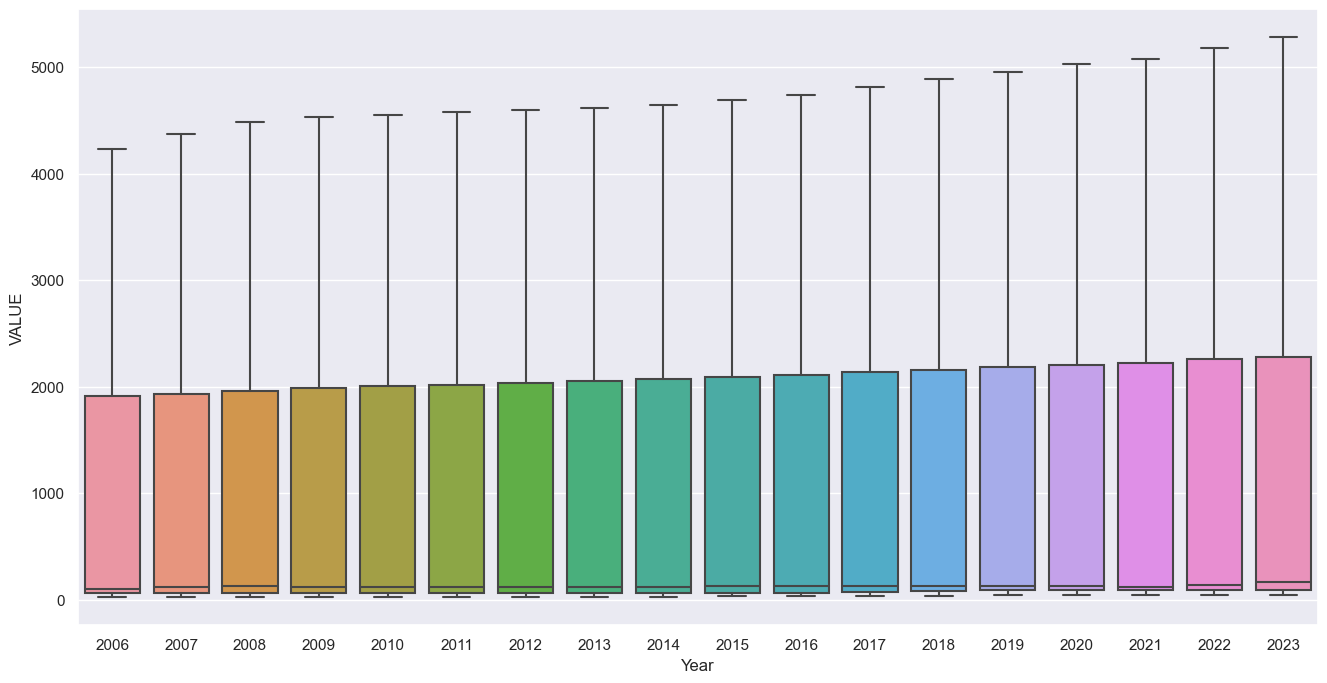

In [14]:
# The seaborn boxplot is a very basic plot. Boxplots are used to visualize distributions.
sns.set(rc={'figure.figsize':(16,8)}) # Adjust the figure size so the labels are clear and do not overlap
sns.boxplot( x=df_all_data["Year"], y=df_all_data["VALUE"] );
plt.show()

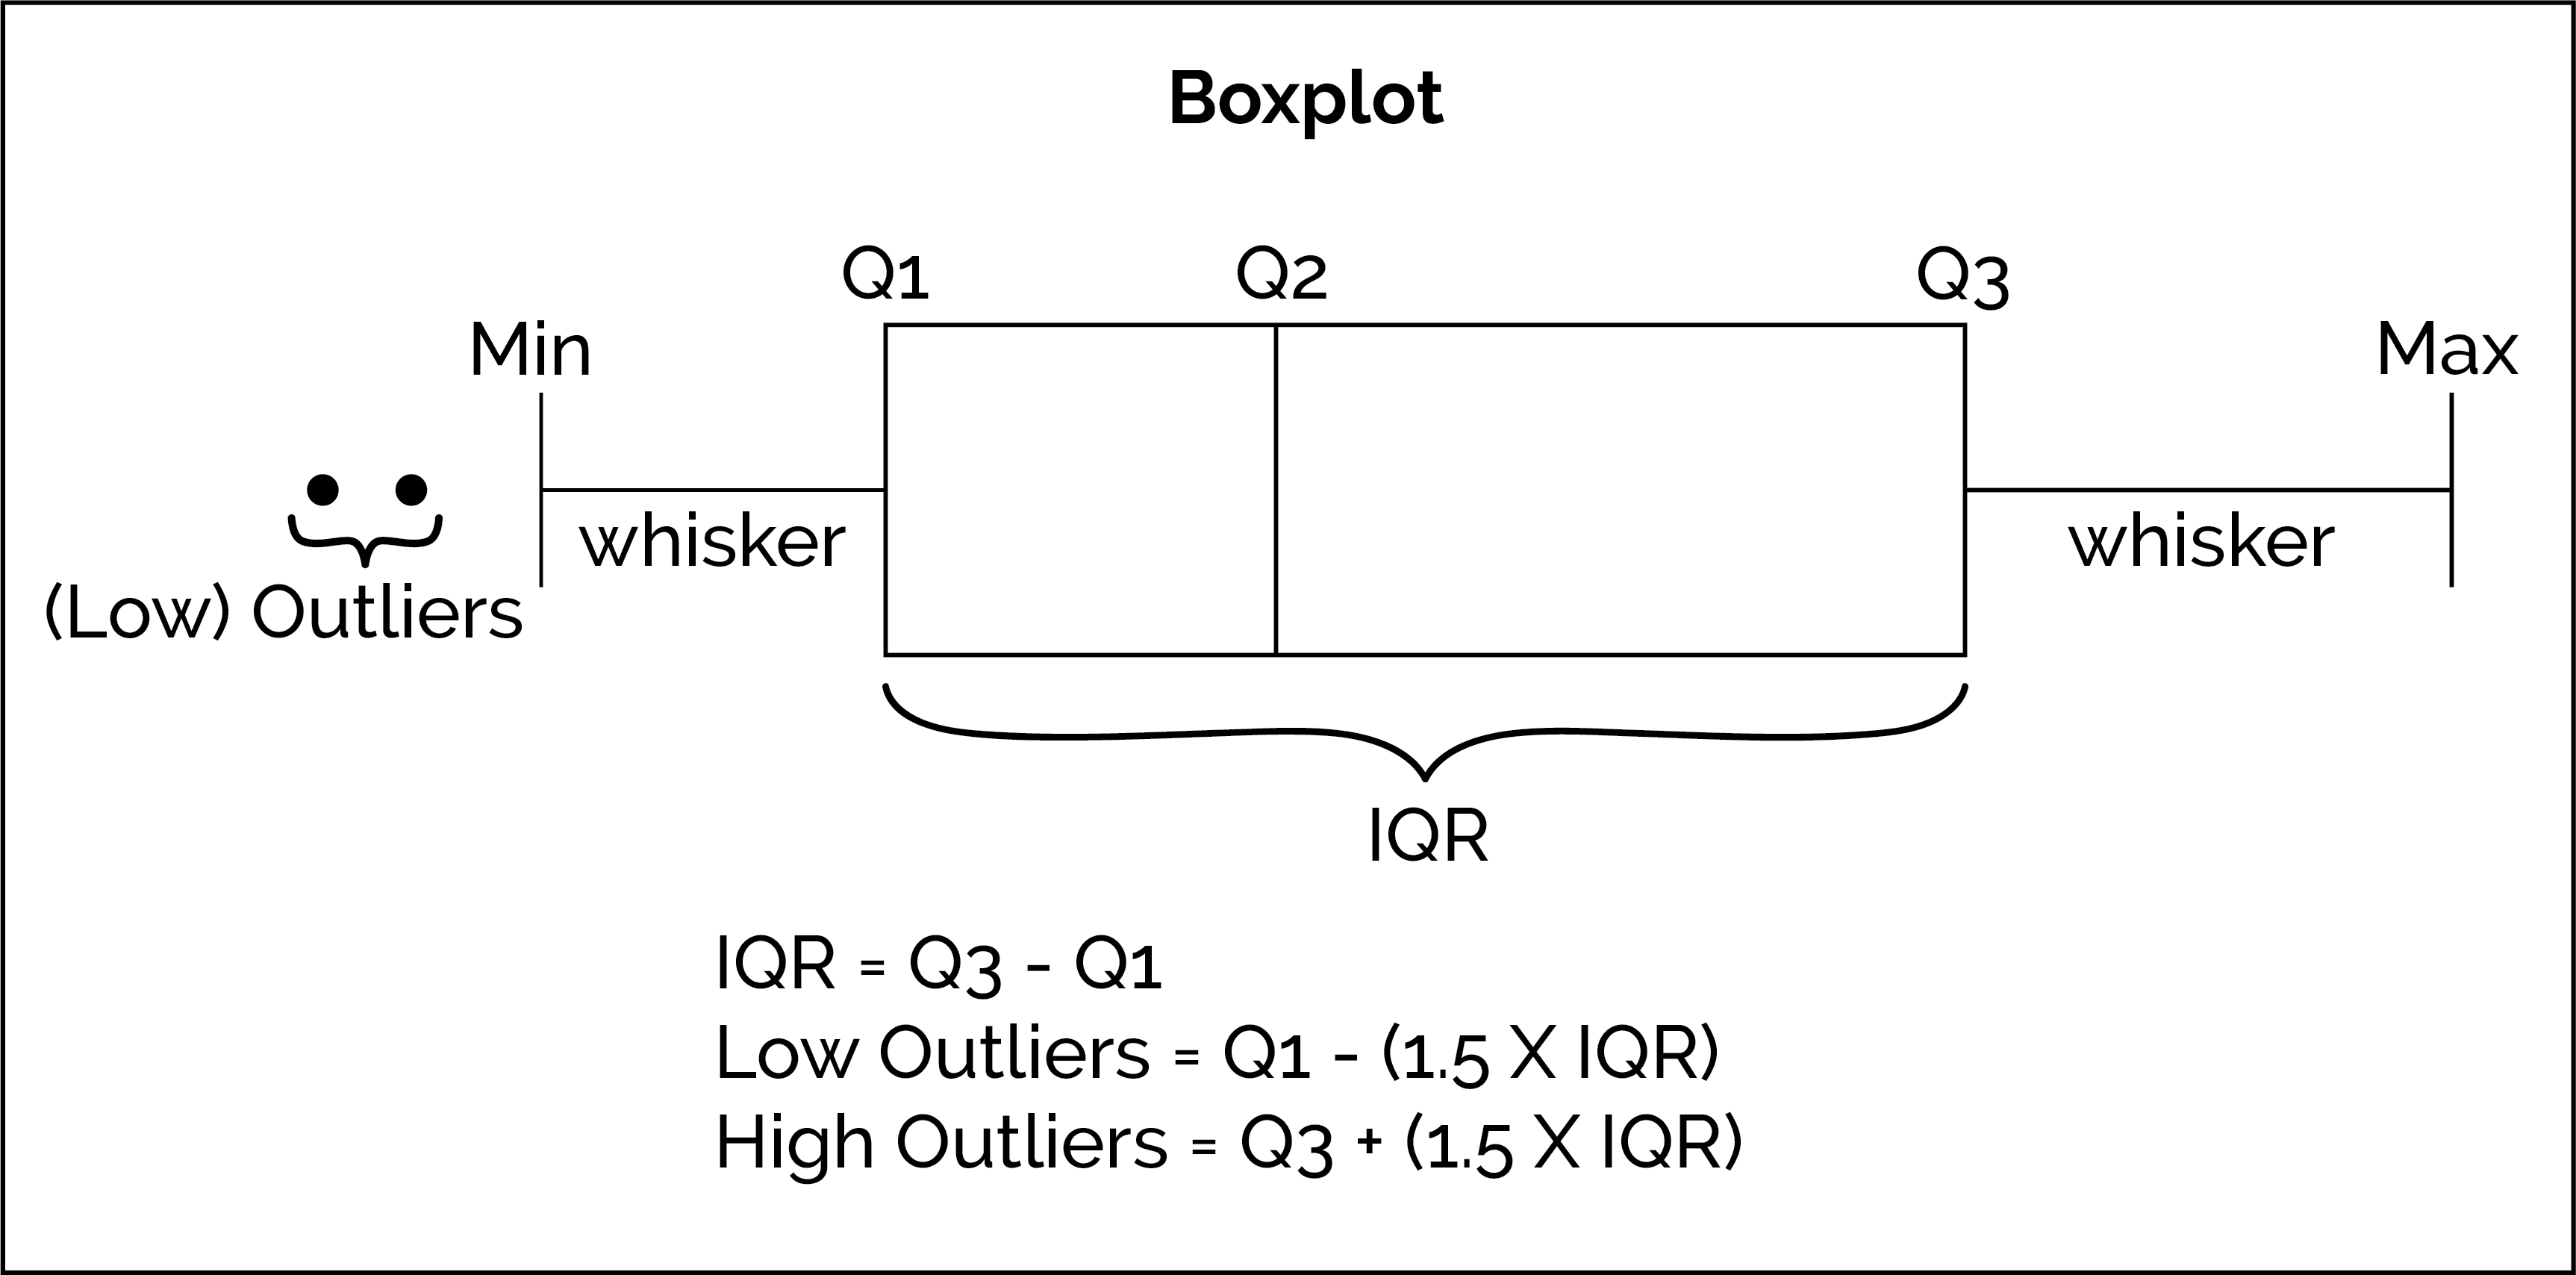

In [15]:
from IPython.display import Image
Image(filename =r'Boxplot-WebG.png', width = 600, height = 300)

# Box plots show the interquartile range (commonly called the IQR), a measure of the spread of the data. 

In [16]:
df_all_data.tail()
df_all_data.shape

(324, 4)

In [17]:
# The IQR is the value of Q3 - Q1. The IQR tells us the range of the middle 50% of the data.
Q1 = df_all_data.quantile(0.25)
Q3 = df_all_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year        9.000
VALUE    2086.425
dtype: float64


C:\Users\stphn\AppData\Local\Temp\ipykernel_2380\1124231937.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_all_data.quantile(0.25)
C:\Users\stphn\AppData\Local\Temp\ipykernel_2380\1124231937.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_all_data.quantile(0.75)


In [18]:
df_all_data.tail()
df_all_data.shape

(324, 4)

In [19]:
# This line was given in the class exercise but deletes a line from the dataset so it has been commented out
# df_all_data = df_all_data[~((df_all_data < (Q1-1.5 * IQR)) |(df_all_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
df_all_data.shape

(324, 4)

In [21]:
df_all_data.tail()
df_all_data.head()
#df_all_data.count() 

,Year,Gender,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4


Text(0, 0.5, '* Thousand')

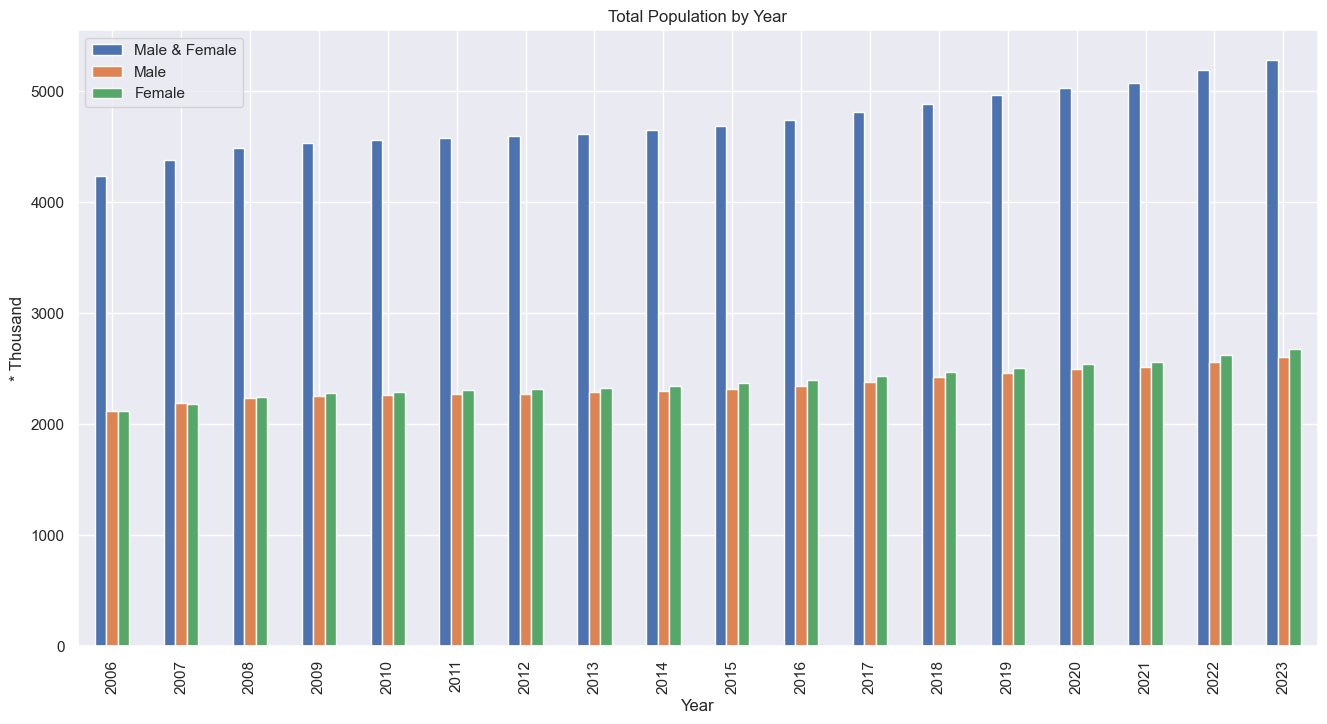

In [22]:
# applying groupby() function to group the data by year.
#totals_by_year = df_all_data.groupby('Year')
#totals_by_year = totals_by_year.first()
#totals_by_year = totals_by_year.drop(["Gender", "Citizenship"], axis=1)
#totals_by_year = totals_by_year.to_numpy()
#totals_by_year = totals_by_year.flatten()

totals_by_year = df_all_data[((df_all_data['Gender'] == "Both sexes") & (df_all_data['Citizenship'] == "All Countries"))]
totals_by_year = totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
totals_by_year = totals_by_year.to_numpy()
totals_by_year = totals_by_year.flatten()

male_totals_by_year = df_all_data[((df_all_data['Gender'] == "Male") & (df_all_data['Citizenship'] == "All Countries"))]
male_totals_by_year = male_totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
male_totals_by_year = male_totals_by_year.to_numpy()
male_totals_by_year = male_totals_by_year.flatten()

female_totals_by_year = df_all_data[((df_all_data['Gender'] == "Female") & (df_all_data['Citizenship'] == "All Countries"))]
female_totals_by_year = female_totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
female_totals_by_year = female_totals_by_year.to_numpy()
female_totals_by_year = female_totals_by_year.flatten()


# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "Male & Female":totals_by_year,
    "Male":male_totals_by_year,
    "Female":female_totals_by_year
    }, 
    index = df_all_data.Year.unique()
)
plotdata.plot(kind="bar")
plt.title("Total Population by Year")
plt.xlabel("Year")
plt.ylabel("* Thousand")

Text(0.5, 1.0, 'Population Growth by Region & Gender - 2006')

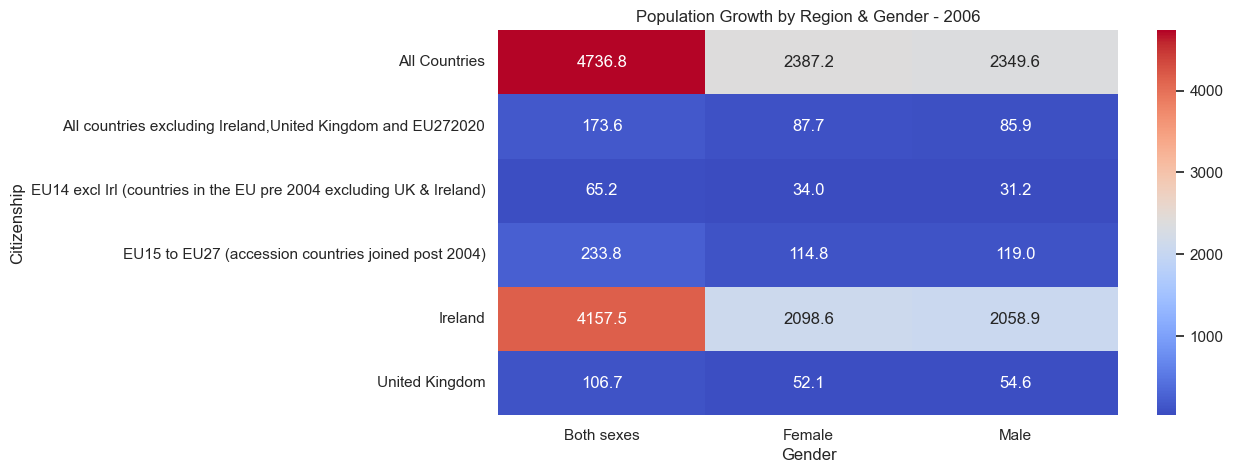

In [23]:
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
#c

#df_all_data = df_all_data.drop(["Year"], axis=1)
#value = round(num)
plt.figure(figsize=(10,5))
data_matrix = df_all_data.pivot_table(index="Citizenship", columns="Gender", values="VALUE")
data_matrix
sns.heatmap(data_matrix, cmap="coolwarm", annot=True, fmt=".1f")
#add title
plt.title('Population Growth by Region & Gender - 2006')

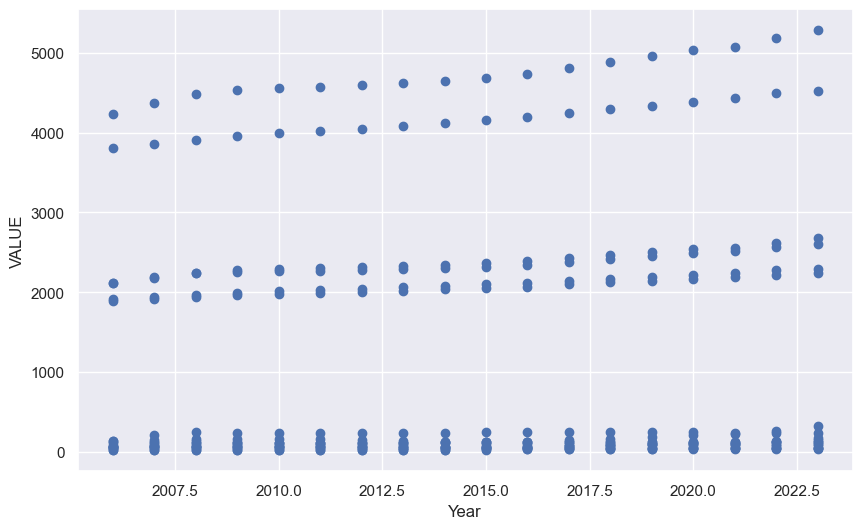

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
#colors = {'Year':'red', 'VALUE':'green'}
#ax.scatter(df_all_data["Year"], c=df_all_data["VALUE"].map(colors))
ax.scatter(df_all_data["Year"], df_all_data["VALUE"])
ax.set_xlabel("Year")
ax.set_ylabel("VALUE")
plt.show()

       X       Y                                           Category
0   2006  4232.9                                      All Countries
1   2007  4375.8  EU14 excl Irl (countries in the EU pre 2004 ex...
2   2008  4485.1  EU15 to EU27 (accession countries joined post ...
3   2009  4533.4                                     United Kingdom
4   2010  4554.8                                            Ireland
5   2011  4574.9  All countries excluding Ireland,United Kingdom...
6   2012  4593.7                                      All Countries
7   2013  4614.7  EU14 excl Irl (countries in the EU pre 2004 ex...
8   2014  4645.4  EU15 to EU27 (accession countries joined post ...
9   2015  4687.8                                     United Kingdom
10  2016  4739.6                                            Ireland
11  2017  4810.9  All countries excluding Ireland,United Kingdom...
12  2018  4884.9                                      All Countries
13  2019  4958.5  EU14 excl Irl (countries in th

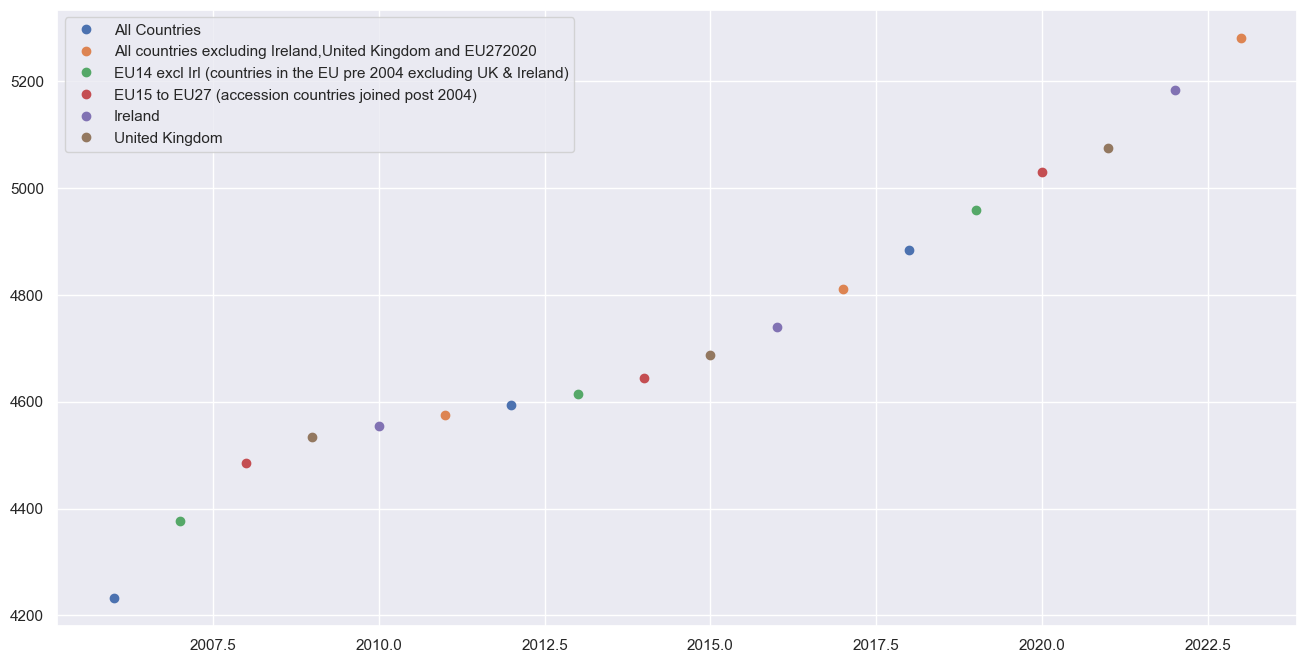

In [62]:
# Generate the categorical data
#totals_by_year,
#male_totals_by_year
#female_totals_by_year
 

x = df_all_data.Year.unique()
y = totals_by_year
c = ['All Countries', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)', 'EU15 to EU27 (accession countries joined post 2004)', 'United Kingdom', 'Ireland', 'All countries excluding Ireland,United Kingdom and EU272020', 'All Countries', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)', 'EU15 to EU27 (accession countries joined post 2004)', 'United Kingdom', 'Ireland', 'All countries excluding Ireland,United Kingdom and EU272020', 'All Countries', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)', 'EU15 to EU27 (accession countries joined post 2004)', 'United Kingdom', 'Ireland', 'All countries excluding Ireland,United Kingdom and EU272020']
data = pd.DataFrame({"X": x, "Y": y, "Category": c})
print(data)
# Plot data by category
groups = data.groupby("Category")
for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name)
plt.legend()
plt.show()

In [58]:
print(df_all_data.Year.unique()) 

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023]
